**Regression Project on Transport Demand Prediction**

**Problem Statement**
To ascertain the demand of the transportation from various cities in Kenya to the capital Nairobi.

In [2]:
from google.colab import drive # Mounting Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # importing numpy
import pandas as pd # importing pandas

In [4]:
df=pd.read_csv('/content/drive/MyDrive/train_revised.csv') # reading CSV file

In [5]:
df # dataframe

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [6]:
df.info() # calling info function to analyse the datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [7]:
df.dropna(inplace=True) # droping null values if any

In [8]:
df['travel_date']=pd.to_datetime(df['travel_date']) # converting datetime to datetime data type

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ride_id          51645 non-null  int64         
 1   seat_number      51645 non-null  object        
 2   payment_method   51645 non-null  object        
 3   payment_receipt  51645 non-null  object        
 4   travel_date      51645 non-null  datetime64[ns]
 5   travel_time      51645 non-null  object        
 6   travel_from      51645 non-null  object        
 7   travel_to        51645 non-null  object        
 8   car_type         51645 non-null  object        
 9   max_capacity     51645 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 3.9+ MB


In [9]:
new_df=pd.DataFrame(df.groupby(by='ride_id').seat_number.count()) # grouping by ride_id and counting seats booked
new_df.reset_index(inplace=True) # reseting index
new_df

,ride_id,seat_number
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


In [10]:
df.drop_duplicates('ride_id',inplace=True) # droping duplicates for joining with new_df
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51575,13812,2B,Mpesa,FSAA2XB4WX,2018-04-20,23:10,Ndhiwa,Nairobi,Bus,49
51605,13813,14B,Mpesa,TSOPCEGOKH,2018-04-20,7:05,Ndhiwa,Nairobi,Bus,49
51639,13825,24A,Mpesa,B3R9XWCV9O,2018-04-20,7:09,Rongo,Nairobi,Bus,49
51640,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49


In [11]:
final_df=df.merge(new_df,on='ride_id',how='left') # joining on ride_id and using left join
final_df

,ride_id,seat_number_x,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seat_number_y
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,2B,Mpesa,FSAA2XB4WX,2018-04-20,23:10,Ndhiwa,Nairobi,Bus,49,11
6245,13813,14B,Mpesa,TSOPCEGOKH,2018-04-20,7:05,Ndhiwa,Nairobi,Bus,49,11
6246,13825,24A,Mpesa,B3R9XWCV9O,2018-04-20,7:09,Rongo,Nairobi,Bus,49,1
6247,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,8:00,Awendo,Nairobi,Bus,49,1


**Exploratory Data Analysis 1**

[Text(0, 0, 'Awendo'),
 Text(1, 0, 'Homa Bay'),
 Text(2, 0, 'Kehancha'),
 Text(3, 0, 'Kendu Bay'),
 Text(4, 0, 'Keroka'),
 Text(5, 0, 'Keumbu'),
 Text(6, 0, 'Kijauri'),
 Text(7, 0, 'Kisii'),
 Text(8, 0, 'Mbita'),
 Text(9, 0, 'Migori'),
 Text(10, 0, 'Ndhiwa'),
 Text(11, 0, 'Nyachenge'),
 Text(12, 0, 'Oyugis'),
 Text(13, 0, 'Rodi'),
 Text(14, 0, 'Rongo'),
 Text(15, 0, 'Sirare'),
 Text(16, 0, 'Sori')]

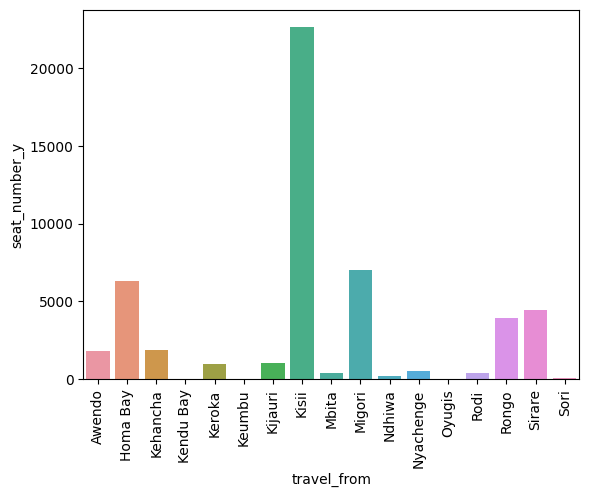

In [ ]:
eda1=pd.DataFrame(final_df.groupby(by='travel_from')['seat_number_y'].sum()) # grouping by travel_from and suming up the seats booked
eda1.reset_index(inplace=True) # reset index
eda1
import seaborn as sns # importing seaborn
plt=sns.barplot(data=eda1,x='travel_from',y='seat_number_y') # ploting barplot
plt.set_xticklabels(labels=eda1['travel_from'],rotation=90) # rotating xlabels

In [ ]:
final_df['travel_time'].replace({'AM':1,'PM':0},inplace=True) # replacing AM with 1 and PM with 0

In [ ]:
final_df

,ride_id,seat_number_x,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seat_number_y
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,1,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,1,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,1,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,1,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,1,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,2B,Mpesa,FSAA2XB4WX,2018-04-20,0,Ndhiwa,Nairobi,Bus,49,11
6245,13813,14B,Mpesa,TSOPCEGOKH,2018-04-20,1,Ndhiwa,Nairobi,Bus,49,11
6246,13825,24A,Mpesa,B3R9XWCV9O,2018-04-20,1,Rongo,Nairobi,Bus,49,1
6247,13826,9B,Mpesa,8V2XDDZR6V,2018-04-20,1,Awendo,Nairobi,Bus,49,1


In [ ]:
final_df['month']=final_df['travel_date'].dt.month # creating a month column
final_df['week_day']=final_df['travel_date'].dt.weekday # creating a week_day column 0=Monday


**Exploratory Data Analysis 2**

<Axes: ylabel='month'>

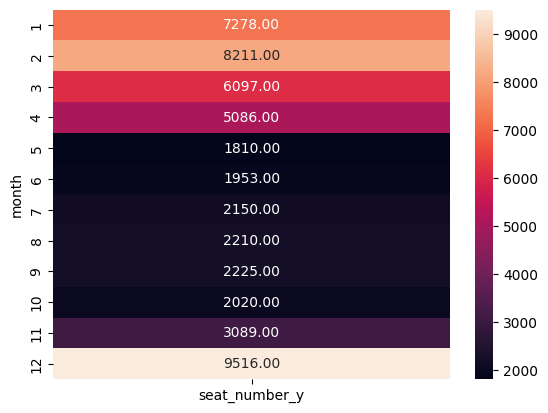

In [ ]:
eda2=pd.DataFrame(final_df.groupby(by='month')['seat_number_y'].sum()) # month wise seats booked
sns.heatmap(data=eda2,annot=True,fmt="0.2f") # ploting a heatmap

In [ ]:
n=pd.DataFrame(final_df.groupby(by=['travel_from','month','week_day']).seat_number_y.count()) # creating a dataframe 'n' by grouping travel_from, month and week_day and counting seats
n.reset_index(inplace=True) # reseting index
n.info()
n

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   travel_from    666 non-null    object
 1   month          666 non-null    int64 
 2   week_day       666 non-null    int64 
 3   seat_number_y  666 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 20.9+ KB


,travel_from,month,week_day,seat_number_y
0,Awendo,1,0,3
1,Awendo,1,1,1
2,Awendo,1,2,3
3,Awendo,1,3,7
4,Awendo,1,4,3
...,...,...,...,...
661,Sori,4,6,2
662,Sori,9,1,1
663,Sori,10,3,1
664,Sori,11,6,2


**Exploratory Data Analysis 3**

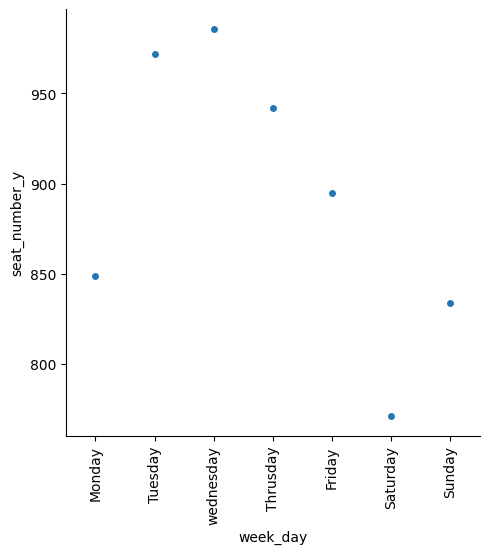

In [ ]:
eda3=pd.DataFrame(n.groupby(by='week_day')['seat_number_y'].sum()) # grouping by week_day and counting the seats booked
eda3.reset_index(inplace=True) # reset index
eda3['week_day'].replace({0:'Monday',1:'Tuesday',2:'wednesday',3:'Thrusday',4:'Friday',5:'Saturday',6:'Sunday'},inplace=True) # replacing the weekdays with weekday names
eda3
ax=sns.catplot(data=eda3,x='week_day',y='seat_number_y') # ploting a catplot
ax.set_xticklabels(label=eda3['week_day'],rotation=90) # rotating x labels

In [ ]:


n['Dist_to_Nairobi']=n.loc[:,'travel_from'] # creating a duplicate column of travel_from with name Dist_to_Nairobi
n['Dist_to_Nairobi'].replace({'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371},inplace=True) # replacing the values in distance to Nairobi with the actual values from the internet(google maps)
n

,travel_from,month,week_day,seat_number_y,Dist_to_Nairobi
0,Awendo,1,0,3,351.0
1,Awendo,1,1,1,351.0
2,Awendo,1,2,3,351.0
3,Awendo,1,3,7,351.0
4,Awendo,1,4,3,351.0
...,...,...,...,...,...
661,Sori,4,6,2,399.0
662,Sori,9,1,1,399.0
663,Sori,10,3,1,399.0
664,Sori,11,6,2,399.0


**One Hot encoding**

In [ ]:
ohe=pd.get_dummies(n,columns=['travel_from']) # doing hot encoding for label encoding
ohe

,month,week_day,seat_number_y,Dist_to_Nairobi,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1,0,3,351.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,351.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,3,351.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,7,351.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,3,351.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,4,6,2,399.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
662,9,1,1,399.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
663,10,3,1,399.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
664,11,6,2,399.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split # train test split
x=ohe.drop(columns=['seat_number_y'],axis=1) # droping our target variable
y=ohe.drop(columns=['month','week_day','Dist_to_Nairobi','travel_from_Awendo','travel_from_Homa Bay','travel_from_Kehancha','travel_from_Kendu Bay','travel_from_Keroka','travel_from_Keumbu','travel_from_Kijauri','travel_from_Kisii','travel_from_Mbita','travel_from_Migori','travel_from_Ndhiwa','travel_from_Nyachenge','travel_from_Oyugis','travel_from_Rodi','travel_from_Rongo','travel_from_Sirare','travel_from_Sori'],axis=1) # including only the target varibale

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

**Multinomial Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression # importing linearregression from linaer_model
lg_reg=LinearRegression()# creating a linear Regression object
lg_reg.fit(x_train,y_train) # fitting the object over training data

LinearRegression()

In [ ]:
y_pred=lg_reg.predict(x_test) # prediction using linear Regression


In [ ]:
from sklearn.metrics import r2_score # importing r2 score
score=r2_score(y_test,y_pred) # calculating r2 score
score

0.5730521446608027

In [ ]:
lg_reg.coef_ # coeficients of linear regression

array([[-0.26304346, -0.09375814, -0.09332358, -2.39485342,  0.2239179 ,
         0.53621368, -6.41162649, -6.41504775, -9.30533591, -4.61947446,
        36.6921555 ,  0.59037992,  1.61119127, -1.80544271, -4.48856966,
        -6.94595401, -2.36174227,  3.42497682,  1.35095105,  0.31826055]])

In [ ]:
lg_reg.intercept_ # y intercept of the linear regression

array([40.43298611])

In [ ]:
gh=pd.array([1,1,270,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]) # predicting target variable using a random data
gh=gh.reshape(1,-1) # reshaping the array with 1 row and 23 columns
lg_reg.predict(gh) # prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.51707461612638]], dtype=object)

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor # importing RandomForest Regressor
Rand_f_reg= RandomForestRegressor() # creating a object for Random Forest Regressor
Rand_f_reg.fit(x_train,y_train) # training random forest Regressor on traing data

<ipython-input-224-ef468868c7eb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rand_f_reg.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
print(Rand_f_reg.score(x_train,y_train)) # calculating traing score to check overfitting
print(Rand_f_reg.score(x_test,y_test)) # calculating test score to check performance

0.9600236689175973
0.82573851736539


In [ ]:
y___pred=Rand_f_reg.predict(x_test) # prediction
r2_score(y_test,y___pred) # calculating r2 score

0.82573851736539

**Using GridSearch CV to improve the Random Forest Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV # importing grid search cv
parameters={'n_estimators':[1,2,3,4,10], 'max_depth':[2,3,5,7,8], 'min_samples_split':[2,3,4,5], 'max_features':[1,2,3,4], 'bootstrap':[True,False], 'n_jobs':[-1]} # creating parameters for grodsearchcv


In [ ]:
gscv_RFR= GridSearchCV(Rand_f_reg,param_grid=parameters) # creating grid search object with Randomforest
y_train=np.ravel(y_train) # creating a 1d array using ravel function
gscv_RFR.fit(x_train,y_train) # fitting the gridsearch gridsearchcv

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, 7, 8],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [1, 2, 3, 4, 10], 'n_jobs': [-1]})

In [ ]:
n_RF=gscv_RFR.best_params_ # getting best parameters
n_RF

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 3,
 'min_samples_split': 5,
 'n_estimators': 3,
 'n_jobs': -1}

In [ ]:
Rand_f_reg_=RandomForestRegressor(bootstrap= True,
 max_depth= 7,
 max_features= 3,
 min_samples_split= 5,
 n_estimators= 3,
 n_jobs= -1) # paasing the best parameters to the random forest object
Rand_f_reg_.fit(x_train,y_train) # fitting the traing data

RandomForestRegressor(max_depth=7, max_features=3, min_samples_split=5,
                      n_estimators=3, n_jobs=-1)

In [ ]:
y__predict=Rand_f_reg_.predict(x_test) # prediction on test data

In [ ]:
r2_score(y_test,y__predict) # calculating r2 score

0.7282775417850909

**Gradient Boost Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor # importing Gradient boost regressor
gd_boost_Reg= GradientBoostingRegressor(learning_rate=0.1) # creating a gradient boost regressor with o.1 as the learning rate
gd_boost_Reg.fit(x_train,y_train) # fitting the gradient boost Regressor on the traing data

GradientBoostingRegressor()

In [ ]:
y_pre=gd_boost_Reg.predict(x_test) # prediction on test data

In [ ]:
r2_score(y_test,y_pre) # calculating r2 score

0.8300741881643191

**Using GridSearchCV with Gradient Boost Regressor**

In [ ]:
paramtr={ 'learning_rate':[0.1,0.2,0.3,0.4], 'n_estimators':[10,20,30], 'min_samples_split':[2,3,4,5], 'min_samples_leaf':[8,9,10,11,20,25,32], 'max_depth':[3,4,5,6]} # parameters for the gridsearchcv

In [ ]:
gscv_GBR= GridSearchCV(gd_boost_Reg,param_grid=paramtr) # creating a gradient boost regressor
gscv_GBR.fit(x_train,y_train) # fitting the grid search object on the training data

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [8, 9, 10, 11, 20, 25, 32],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30]})

In [ ]:
gscv_GBR.best_params_ # getting the best parameters

{'learning_rate': 0.4,
 'max_depth': 3,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'n_estimators': 30}

In [ ]:
print(gscv_GBR.score(x_train,y_train)) # calculating score for checking overfitting
print(gscv_GBR.score(x_test,y_test)) # checking performance on test data

0.8566934193235304
0.7831514118216066


In [ ]:
grd_boost_reg_=GradientBoostingRegressor(learning_rate= 0.4,
 max_depth= 3,
 min_samples_leaf= 11,
 min_samples_split= 2,
 n_estimators= 30) # passing best parameters to the gradient boost regressor object

In [ ]:
grd_boost_reg_.fit(x_train,y_train) # fitting the training data on the gradient boost regressor with the best parameters

GradientBoostingRegressor(learning_rate=0.4, min_samples_leaf=11,
                          n_estimators=30)

In [ ]:
prediction = grd_boost_reg_.predict(x_test) # prediction on test data

In [ ]:
r2_score(y_test,prediction) # calculating r2 score

0.7831514118216067

**Conclusion**
The gradient Boost Regressor and Random Forest Regressor have out performed the Multinomial Linear Regression. The prediction when done on adding the weekday variable to the data has shown high relaibility by showing high r2 score values.
Hence, given the dataset and algorithms used the accuracy of regression increases exponentially when the weekdays are included as the independent variables while if we move on only with the month variable single handedly or go to the higher dimensions like quater the model does not perform well. Hence, the prediction here can be made weekwise for any given month in the year.